In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
data=pd.read_csv("Downloads/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

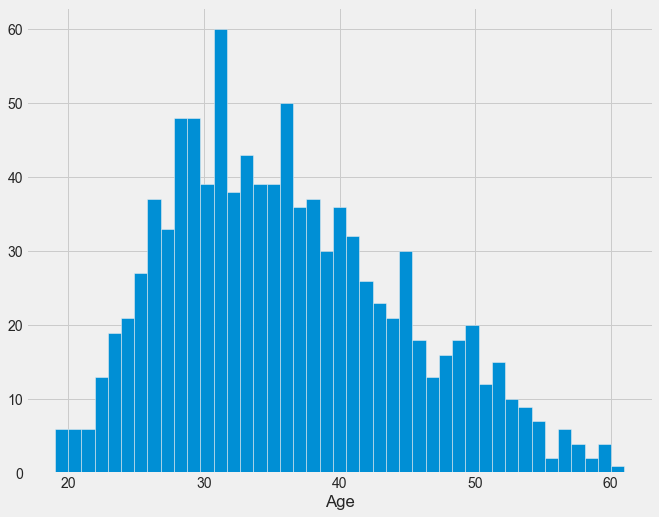

In [9]:
plt.figure(figsize=(10,8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

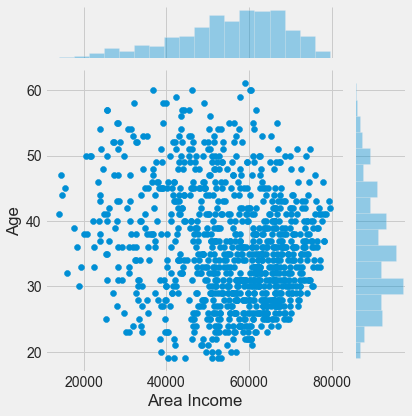

In [10]:
sns.jointplot(data['Area Income'],data.Age)

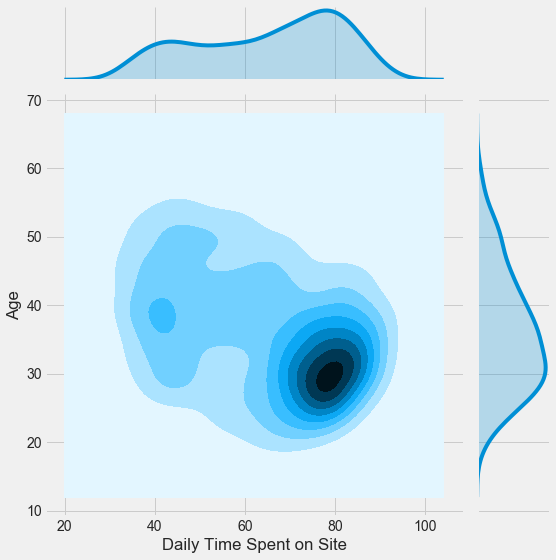

In [15]:
sns.jointplot(data['Daily Time Spent on Site'],data.Age,kind='kde',height=8)

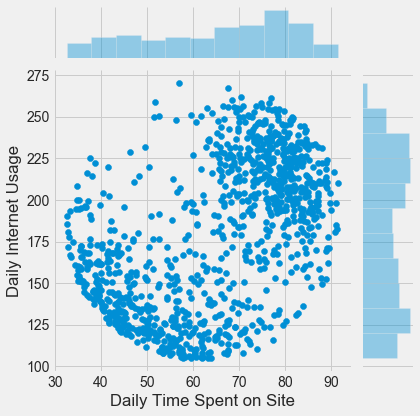

In [17]:
sns.jointplot(data['Daily Time Spent on Site'],data['Daily Internet Usage'])

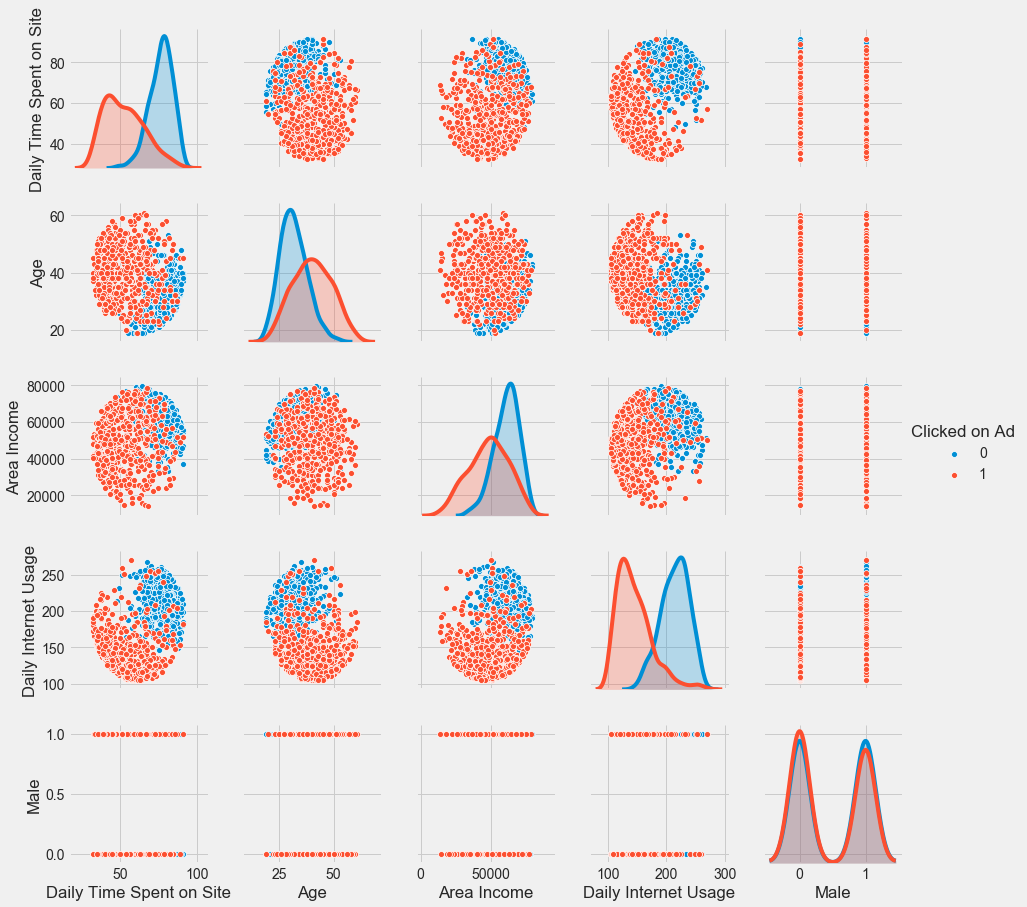

In [24]:
sns.pairplot(data, hue='Clicked on Ad')

In [25]:
data['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

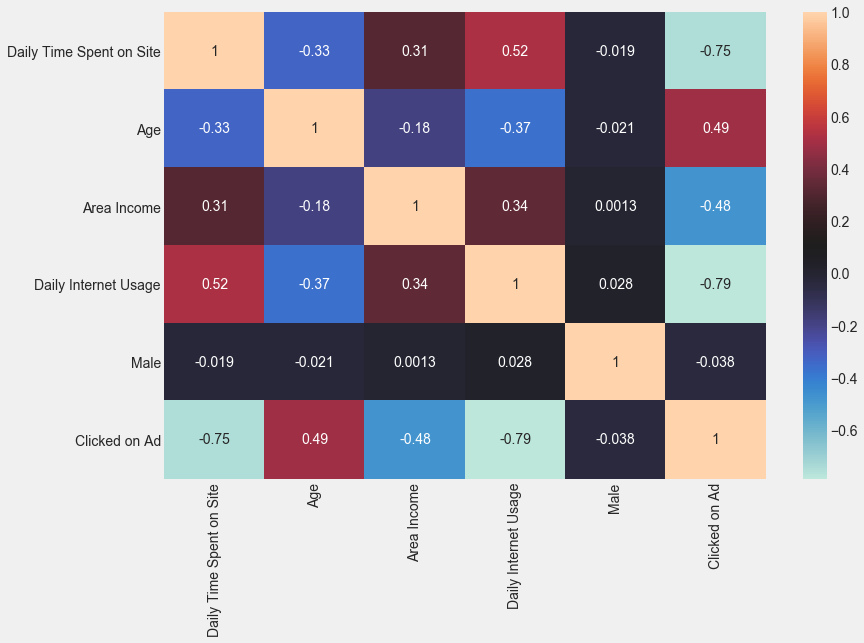

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True,cmap='icefire')

Text(0.5, 1.0, 'Sigmod Function')

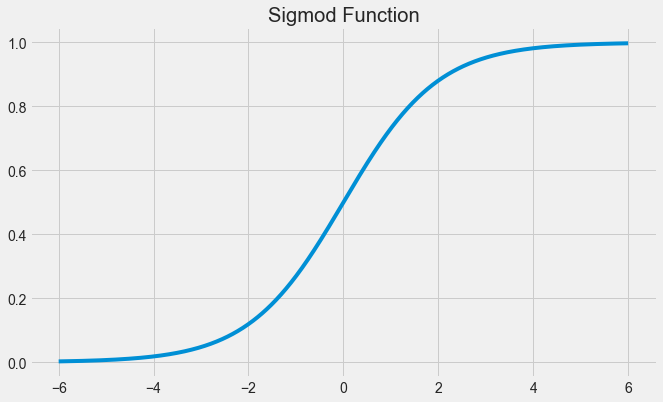

In [29]:
x=np.linspace(-6,6,num=1000)
plt.figure(figsize=(10,6))
plt.plot(x,(1/(1+np.exp(-x))))
plt.title('Sigmod Function')

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train,y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946667    0.973333      0.96    0.960000      0.960356
recall       0.972603    0.948052      0.96    0.960327      0.960000
f1-score     0.959459    0.960526      0.96    0.959993      0.960007
support    146.000000  154.000000      0.96  300.000000    300.000000
_______________________________________________

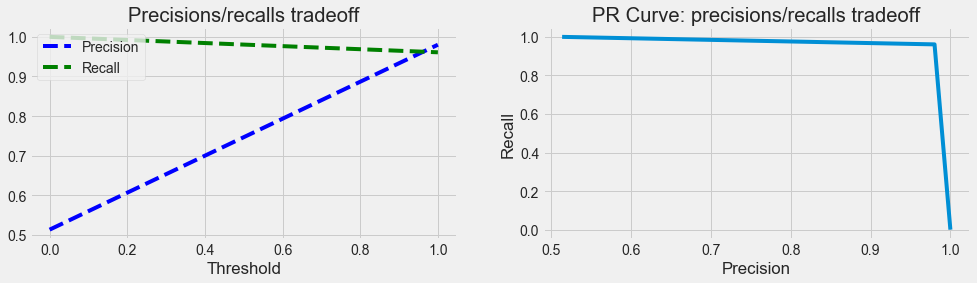

In [46]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

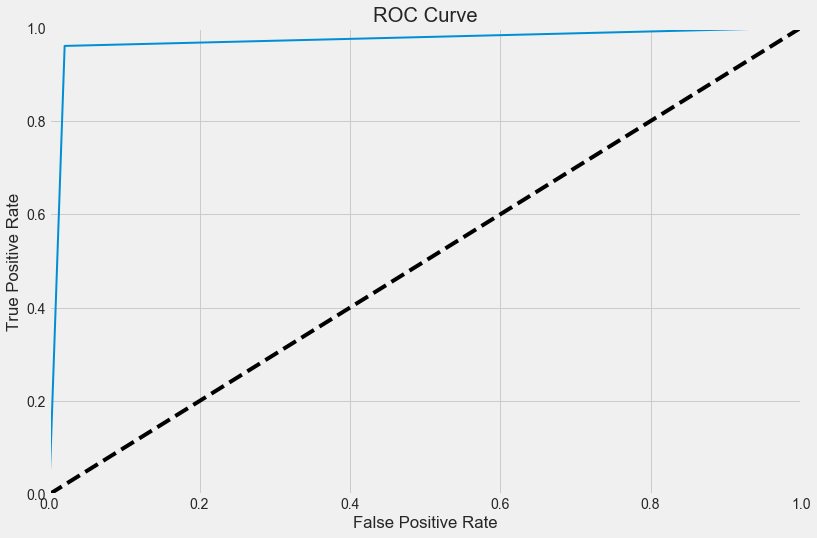

In [53]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,lr_clf.predict(X_test))

0.9702455079167409

In [58]:
from sklearn.model_selection import GridSearchCV
lr_clf=LogisticRegression()
penalty=['l1','l2']
C=[0.5,0.6,0.7,0.8]
class_weight=[{1:0.5, 0:0.5}, {1:0.4, 0:0.6},{1:0.6 , 0:0.4},{1:0.7 , 0:0.3}]
solver=['liblinear','saga']
param_grid=dict(penalty=penalty , C=C , class_weight=class_weight , solver=solver)
lr_cv=GridSearchCV(estimator=lr_clf , param_grid=param_grid , scoring='accuracy' , 
                  verbose=1,n_jobs=-1 , cv=10 , iid=True)
lr_cv.fit(X_train , y_train)
best_params=lr_cv.best_params_
print(f"Best parameters:{best_params}")

lr_clf=LogisticRegression(**best_params)
lr_clf.fit(X_train , y_train)
print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)
print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s


Best parameters:{'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 14 332]]

Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0

[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    4.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
